**Contexto**



Esse dataset representa o preço das ações da empresa **NVIDIA**


que foram coletado no periódo do ano 2000 até o ano de 2024.

**Conteúdo do Dataset**


*   Date :  Data das ações registradas
*   Open : O preço de abertura da ação
*   High : O preço mais alto da ação naquele dia


*   low : O preço mais baixo da ação naquele dia
*   Close : O preço de fechamento da ação


*   AdjClose : Adjuntos de fechamento
*   Volume : Volume da ação




**Situação**

A proposta desse caderno é fazer previsão das ações a partir


da coluna "Close" no qual será possível prever cinco dias para frente.



**Modelo Neural LSTM**


O próposito desse modelo neural é treinar com dados recorrência


Ou seja para prever um valor o modelo irá treinar com valor o anterior e assim sucessivamente

###Importação das bibliotecas







In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Conhecendo o Dataframe

In [2]:
df_nvd = pd.read_csv("NVDA.csv")
df_nvd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400


Visualizando os ultimos 10 índices dos dados

In [3]:
df_nvd.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
6106,2024-04-11,874.200012,907.390015,869.260010,906.159973,906.159973,43163700
6107,2024-04-12,896.989990,901.750000,875.299988,881.859985,881.859985,42488900
6108,2024-04-15,890.979980,906.130005,859.289978,860.010010,860.010010,44307700
6109,2024-04-16,864.330017,881.179993,860.640015,874.150024,874.150024,37045300
6110,2024-04-17,883.400024,887.750000,839.500000,840.349976,840.349976,49540000
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900
6115,2024-04-24,839.500000,840.820007,791.830017,796.770020,796.770020,50961600


Visualizando as informações do dataset

Percebe-se que a coluna *Date* está sendo considerado como tipo *Object*, é necessário transformar essa coluna em *datetime*

In [4]:
df_nvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6116 non-null   object 
 1   Open       6116 non-null   float64
 2   High       6116 non-null   float64
 3   Low        6116 non-null   float64
 4   Close      6116 non-null   float64
 5   Adj Close  6116 non-null   float64
 6   Volume     6116 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.6+ KB


Transformação da coluna *Date* em tipo *Data time*

In [5]:
df_nvd["Date"]= pd.to_datetime(df_nvd["Date"], format= '%Y-%m-%d')

Analisando o fechamento da ação durante o tempo

Text(0, 0.5, 'Preço')

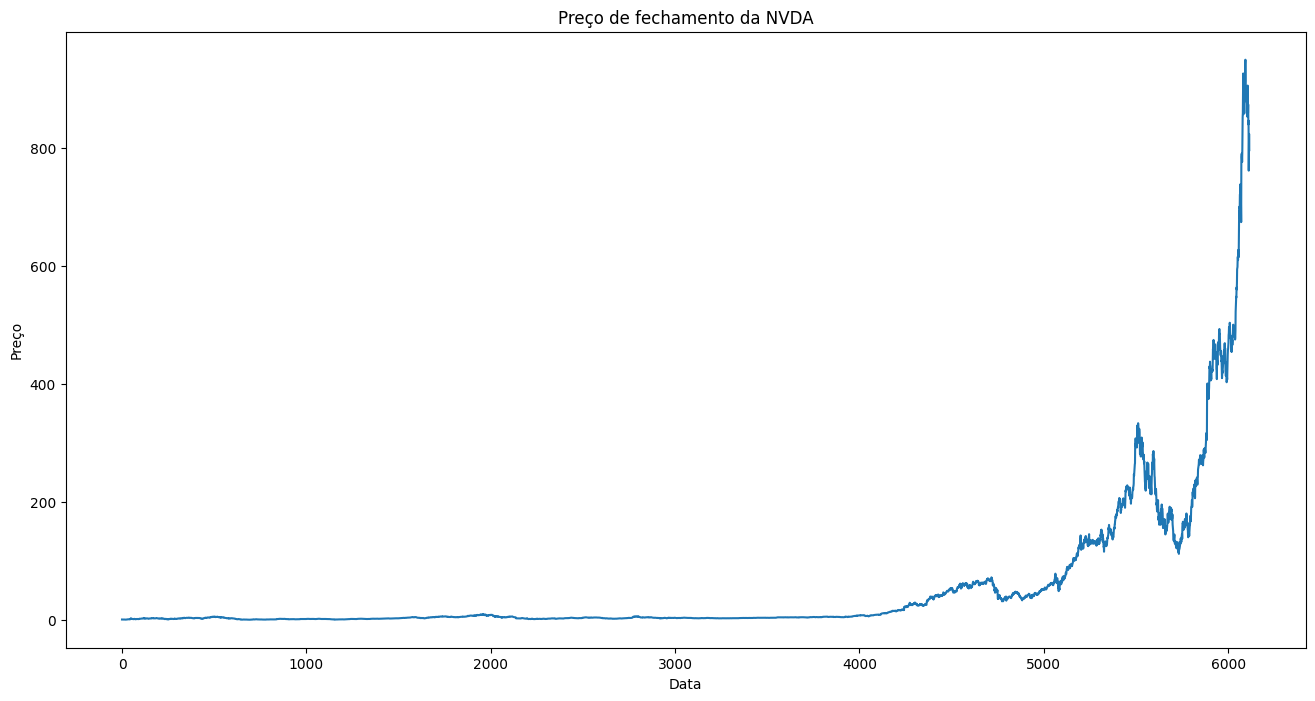

In [6]:
plt.figure(figsize =(16,8))
plt.title("Preço de fechamento da NVDA")
plt.plot(df_nvd["Close"])
plt.xlabel("Data")
plt.ylabel("Preço")

Separando o periodo e os atriubutos que vão ser analisados, iremo separar do ano de 2020 adiante, pois esse periódo é marcado pelo aumento exponecial da empresa

In [7]:
df_nvd[df_nvd["Date"]>="2020-01-01"]

,Date,Open,High,Low,Close,Adj Close,Volume
5031,2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741245,23753600
5032,2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785027,20538400
5033,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031540,26263600
5034,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746223,31485600
5035,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858269,27710800
...,...,...,...,...,...,...,...
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900


Criando novo dataset com intervalo de tempo escolhido

In [8]:
df_nvd=df_nvd[df_nvd["Date"]>="2020-01-01"]
df_nvd.shape

(1085, 7)

Nesse dataset estarão apenas as colunas *Date* e a coluna *Close*

In [9]:
df_nvd_close = df_nvd[["Date", "Close"]]
df_nvd_close.head()

,Date,Close
5031,2020-01-02,59.977501
5032,2020-01-03,59.017502
5033,2020-01-06,59.264999
5034,2020-01-07,59.982498
5035,2020-01-08,60.095001


Vamos ajustar o index do dataframe para que o índice seja as datas do *Date*

In [10]:
df_nvd_close = df_nvd_close.set_index(pd.DatetimeIndex(df_nvd_close["Date"].values))
df_nvd_close.head()

,Date,Close
2020-01-02,2020-01-02,59.977501
2020-01-03,2020-01-03,59.017502
2020-01-06,2020-01-06,59.264999
2020-01-07,2020-01-07,59.982498
2020-01-08,2020-01-08,60.095001


A coluna *Date* será dropada, pois ela está sendo representada pela índice

In [11]:
df_nvd_close.drop("Date", axis =1, inplace=True)
df_nvd_close.head()

,Close
2020-01-02,59.977501
2020-01-03,59.017502
2020-01-06,59.264999
2020-01-07,59.982498
2020-01-08,60.095001


Plotar os dados


Text(0, 0.5, 'Preço')

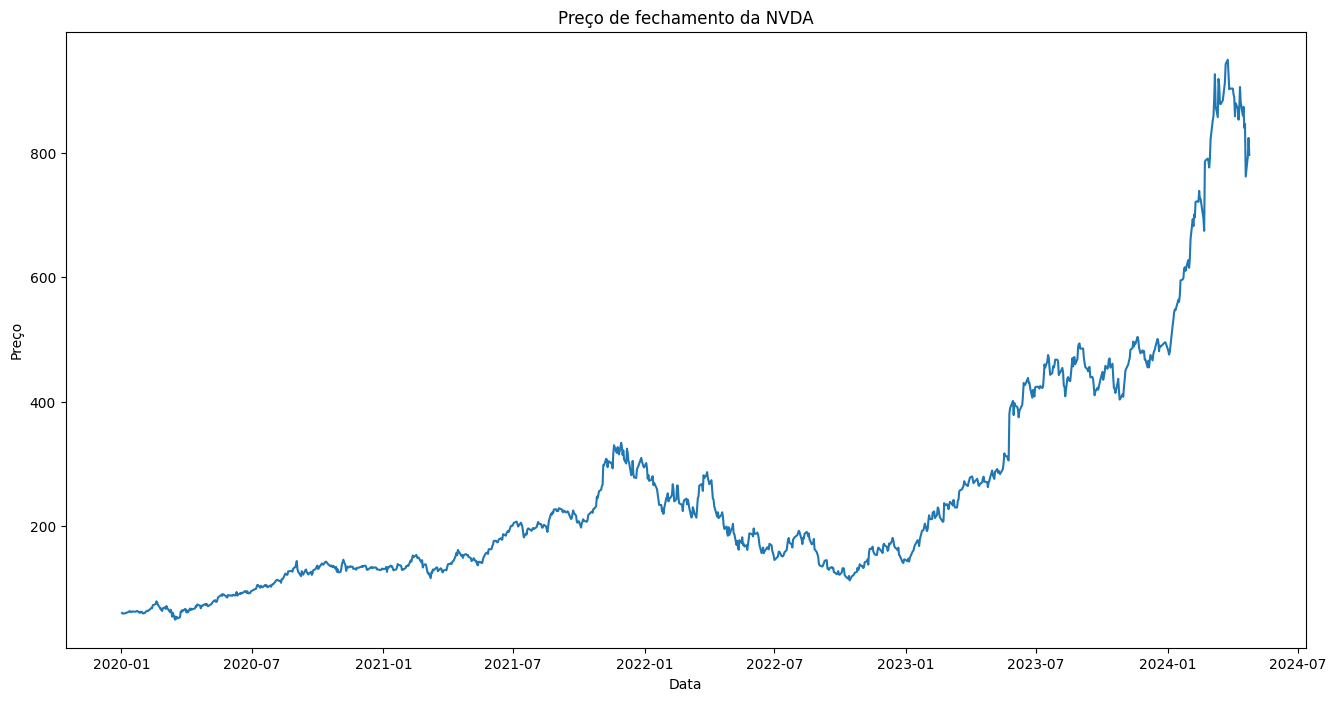

In [12]:
plt.figure(figsize =(16,8))
plt.title("Preço de fechamento da NVDA")
plt.plot(df_nvd_close["Close"])
plt.xlabel("Data")
plt.ylabel("Preço")

Separação dos dados de treino e teste para manter o modelo de recorrência, essa análise possibilita separar os dados de treino e teste pelo índice, ou seja nos dados de treino serão coletado dados do índice 0 até 760 e o restante dos dados serão para teste, possibilitando que o modelo aprenda a recorrência dos dados

In [13]:
quant_linhas = len(df_nvd_close)
quant_linhas_treino = round(.70 * quant_linhas)
quant_linhas_test = quant_linhas - quant_linhas_treino

print(f"Quantidade de linhas de treino: {quant_linhas_treino}")
print(f"Quantidade de linhas de teste: {quant_linhas_test}")
print(f"Quantidade total de linhas: {quant_linhas}")

Quantidade de linhas de treino: 760
Quantidade de linhas de teste: 325
Quantidade total de linhas: 1085


Iremos normalizar os dados pelo *StandarScaler* pois é nítido a diferença entre os valores de fechamento, isso aconteceu devido a valorização da empresa e consequetemente o valor da ação é muito discripante

In [14]:
scaler = StandardScaler()
df_nvd_close_scaled = scaler.fit_transform(df_nvd_close)
df_nvd_close_scaled

array([[-1.03141013],
       [-1.03660515],
       [-1.03526582],
       ...,
       [ 2.94712755],
       [ 3.10433113],
       [ 2.95573195]])

Separando os dados de treino e tese atráves do índice

In [15]:
train = df_nvd_close_scaled[:quant_linhas_treino]
test = df_nvd_close_scaled[quant_linhas_treino:quant_linhas_treino + quant_linhas_test]

verificando a quantidade de dados de treino e e teste

In [16]:
len(train) , len(test)

(760, 325)

Criação da Função que tem propósito
pré-processar dados de séries temporais para serem usados em modelos de aprendizado de máquina.
onde o modelo precisa aprender a prever valores futuros com base em valores passados.


In [17]:
def create_df(df, steps =1):
  dataX, dataY = [], []
  for i in range(len(df)-steps-1):
    a = df[i:(i+steps), 0]
    dataX.append(a)
    dataY.append(df[i+steps,0])
  return np.array(dataX), np.array(dataY)

Abaixo é aplicação da função comentada anteriormente que é processo de preparação de dados para um modelo de aprendizado de máquina. O steps = 10: Define o número de etapas ou "passos" que podem ser usados ​​para gerar os dados. Isso indica o tamanho da janela de tempo, especialmente  lidando com dados temporais ou sequenciais.

In [18]:
#Gerando dados de treino e teste
steps = 10
X_train , Y_train = create_df(train,steps)
X_test, Y_test = create_df(test,steps)

Analisando as dimensões dos dados

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(749, 10)
(749,)
(314, 10)
(314,)


Esse reshape foi usado pois modelos de recorrência esperam que os dados de entrada tenham três dimensões: (n_amostras, n_steps, n_features). Essas redes processam sequências de dados, onde cada sequência é formada por n_stepse cada passo na sequência possui n_features.

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [21]:
X_train.shape

(749, 10, 1)

##Criação do modelo

In [22]:
'''
Arquitetura do modelo
3 - Camadas LSTM sendo 2 usadas retorno de dados
1 - Camada de dropout para evitar overfitting
1 - Camada Dense
'''
modelo =Sequential()
modelo.add(LSTM(units=50, return_sequences=True, input_shape=(steps,1) ))
modelo.add(LSTM(units =50, return_sequences =True))
modelo.add(LSTM(units =50))
modelo.add(Dropout(0.2))
modelo.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Parãmetros dos modelos

*Adam* = Especifica o otimizador,O Adam é um otimizador eficiente que combina as vantagens de dois outros otimizadores, RMSprop e Stochastic Gradient Descent (SGD), sendo amplamente utilizado em deep learning devido à sua eficiência e adaptabilidade.

*Mse* =  Define a função de perda como Mean Squared Error (MSE). Essa função é adequada para problemas de regressão, onde o objetivo é minimizar a média dos quadrados das diferenças entre as previsões e os valores reais.

Além de mostrar o summary da rede neural

In [23]:
modelo.compile(optimizer="adam", loss="mse")
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Treinamento do modelo

In [24]:
validacao = modelo.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=40,batch_size = 10, verbose=1)

Epoch 1/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0895 - val_loss: 0.9902
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - val_loss: 0.9083
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0096 - val_loss: 0.8072
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0074 - val_loss: 0.9375
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0079 - val_loss: 0.8006
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0077 - val_loss: 0.8258
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0074 - val_loss: 0.6247
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0064 - val_loss: 0.6457
Epoch 9/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0065 - val_loss: 0.4528
Epoch 10/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0061 - val_loss: 0.5453
Epoch 11/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - val_loss: 0.4878
Epoch 12/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.

Visualização dos parâmetros do modelo durante as epochs

Gera um gráfico comparativo das funções de perda (loss) durante o treinamento e validação ao longo das épocas. A análise dessas curvas permite avaliar o comportamento do modelo durante o treinamento, identificando potenciais problemas como overfitting ou underfitting. O gráfico ajuda a determinar se o modelo está generalizando bem ou se ajustes são necessários.

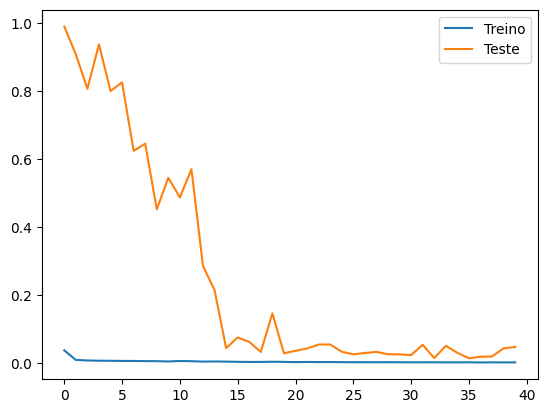

In [25]:
plt.plot(validacao.history["loss"], label="Treino")
plt.plot(validacao.history["val_loss"], label="Teste")
plt.legend()

Previsão dos resultados

In [26]:
previsao = modelo.predict(X_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


O **MSE** é uma métrica que quantifica a diferença entre os valores previstos e os valores reais. Portanto apresenta um MSE abaixo com resultado de 4%, indicando que as previsões do modelo estão, em média, próximas dos valores reais, o que é um sinal de bom desempenho.



In [27]:
mse=mean_squared_error(Y_test,previsao)
mse

0.04831995715000721

Visualização dos resultados normalizados

In [28]:
previsao

array([[-0.36354214],
       [-0.32413244],
       [-0.3041368 ],
       [-0.288209  ],
       [-0.2671812 ],
       [-0.2822071 ],
       [-0.29569897],
       [-0.26795018],
       [-0.21828191],
       [-0.1982334 ],
       [-0.19981216],
       [-0.18222412],
       [-0.16360165],
       [-0.15114169],
       [-0.17203394],
       [-0.1833221 ],
       [-0.15755928],
       [-0.134101  ],
       [-0.1411398 ],
       [-0.17046638],
       [-0.2111951 ],
       [-0.2362816 ],
       [-0.1773195 ],
       [-0.11880852],
       [-0.08310252],
       [-0.078955  ],
       [-0.10185908],
       [-0.11090617],
       [-0.09626659],
       [-0.08669958],
       [-0.08975291],
       [-0.07541256],
       [-0.07838081],
       [-0.09811048],
       [-0.11580782],
       [-0.09901962],
       [-0.07094239],
       [-0.02187636],
       [ 0.01923352],
       [ 0.04242401],
       [ 0.05480872],
       [ 0.0626094 ],
       [ 0.08199698],
       [ 0.08857554],
       [ 0.0798052 ],
       [ 0

O coeficiente de determinação (R²) mede a proporção da variação total dos dados que é explicada pelo modelo. Portanto o modelo explica 96% da variabilidade dos dados

In [29]:
print(r2_score(Y_test,previsao))

0.9571224091782864


##Previsão de valores futuros
Verificando o tamanho dos de teste

In [30]:
lenght_test = len(test)
lenght_test

325

Iremos cirar uma variável que vai receber os dias de entradas, ou seja o modelo irá coletar 10 dias com frequencia e analisar sua recorrência

In [31]:
days_inputs = lenght_test -steps
days_inputs

315

Após separar os dias de entrada, iremos fatiar os dados de teste a partir de um determinado ponto definido por days_inputs = 10, converte a fatia resultante em um array NumPy, e então ajusta a forma do array para ter uma única linha (ou seja, um vetor de linha).

In [32]:
#Transformar em arrays
inputs_steps = test[days_inputs:]
inputs_steps = np.array(inputs_steps).reshape(1,-1)
inputs_steps

array([[3.54769411, 3.41619507, 3.29795425, 3.37447273, 3.19156426,
        3.22598155, 2.76757449, 2.94712755, 3.10433113, 2.95573195]])

Converter uma lista

In [33]:
list_output = list(inputs_steps)
list_output = list_output[0].tolist()
list_output

[3.5476941063808,
 3.416195072007533,
 3.2979542476260546,
 3.374472729323432,
 3.1915642573616316,
 3.225981554504723,
 2.767574492956454,
 2.9471275462341655,
 3.1043311316456466,
 2.955731954397965]

Abaixo vai ser possível obersvar o loop que funciona basicamente pegando os últimos *steps* dias de dados, usando-os para prever o próximo dia, adicionando a previsão ao conjunto de dados e repetindo o processo para o próximo dia até que 5 dias sejam previstos.

In [34]:
#loop para prever os 5 dias
pred_output = []
i =0
n_future =5
while(i<n_future):
  if(len(list_output)>steps):
    inputs_steps = np.array(list_output[1:])
    print(f"{i} dia Valores de entrada --> {inputs_steps}")
    inputs_steps = inputs_steps.reshape(1,-1)
    inputs_steps = inputs_steps.reshape(1,steps,1)
    #print(input_steps)
    pred = modelo.predict(inputs_steps, verbose =0)
    print(f"{i} Dia , Valor previsto --> {pred}")
    list_output.extend(pred[0].tolist())
    list_output = list_output[1:]
    #print(list_output)
    pred_output.extend(pred.tolist())
    i= i +1
  else:
    inputs_steps = inputs_steps.reshape((1,steps,1))
    pred = modelo.predict(inputs_steps, verbose = 0)
    print(pred[0])
    list_output.extend(pred[0].tolist())
    print(len(list_output))
    pred_output.extend(pred.tolist())
    i = i +1

print(pred_output)



[2.668517]
11
1 dia Valores de entrada --> [3.41619507 3.29795425 3.37447273 3.19156426 3.22598155 2.76757449
 2.94712755 3.10433113 2.95573195 2.66851711]
1 Dia , Valor previsto --> [[2.619445]]
2 dia Valores de entrada --> [3.29795425 3.37447273 3.19156426 3.22598155 2.76757449 2.94712755
 3.10433113 2.95573195 2.66851711 2.61944509]
2 Dia , Valor previsto --> [[2.528957]]
3 dia Valores de entrada --> [3.37447273 3.19156426 3.22598155 2.76757449 2.94712755 3.10433113
 2.95573195 2.66851711 2.61944509 2.52895689]
3 Dia , Valor previsto --> [[2.4078486]]
4 dia Valores de entrada --> [3.19156426 3.22598155 2.76757449 2.94712755 3.10433113 2.95573195
 2.66851711 2.61944509 2.52895689 2.4078486 ]
4 Dia , Valor previsto --> [[2.2735934]]
[[2.6685171127319336], [2.6194450855255127], [2.528956890106201], [2.407848596572876], [2.2735934257507324]]


Prevendo a saída e transformando os dados normalizado para valores normais

In [35]:
#Prever a saída
previsao = scaler.inverse_transform(pred_output)
previsao = np.array(previsao).reshape(1,-1)
list_output = list(previsao)
list_output = list_output[0].tolist()
list_output
#

[743.6949747027447,
 734.6268497698508,
 717.9053424727756,
 695.5254817111626,
 670.7161813580091]

Comando no qual capturamos dias futuros após os ultimos dias do dataframe

In [36]:
dates = pd.to_datetime(df_nvd["Date"])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(1), periods=5, freq="b").tolist()
predict_dates


[Timestamp('2024-04-25 00:00:00'),
 Timestamp('2024-04-26 00:00:00'),
 Timestamp('2024-04-29 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-01 00:00:00')]

Criando um dataframe dos valores dos futuros

In [37]:
#Criar dataframe de previsão
forecast_dates = []
for i in predict_dates:
  forecast_dates.append(i.date())

df_forecast = pd.DataFrame({"Date" : np.array(forecast_dates), "Close":list_output })
df_forecast["Date"] = pd.to_datetime(df_forecast["Date"])

df_forecast = df_forecast.set_index(pd.DatetimeIndex(df_forecast["Date"].values))
df_forecast.drop("Date", axis =1, inplace = True)
df_forecast


,Close
2024-04-25,743.694975
2024-04-26,734.626850
2024-04-29,717.905342
2024-04-30,695.525482
2024-05-01,670.716181


Plotando a tendência dos valores para os proximos dias futuros

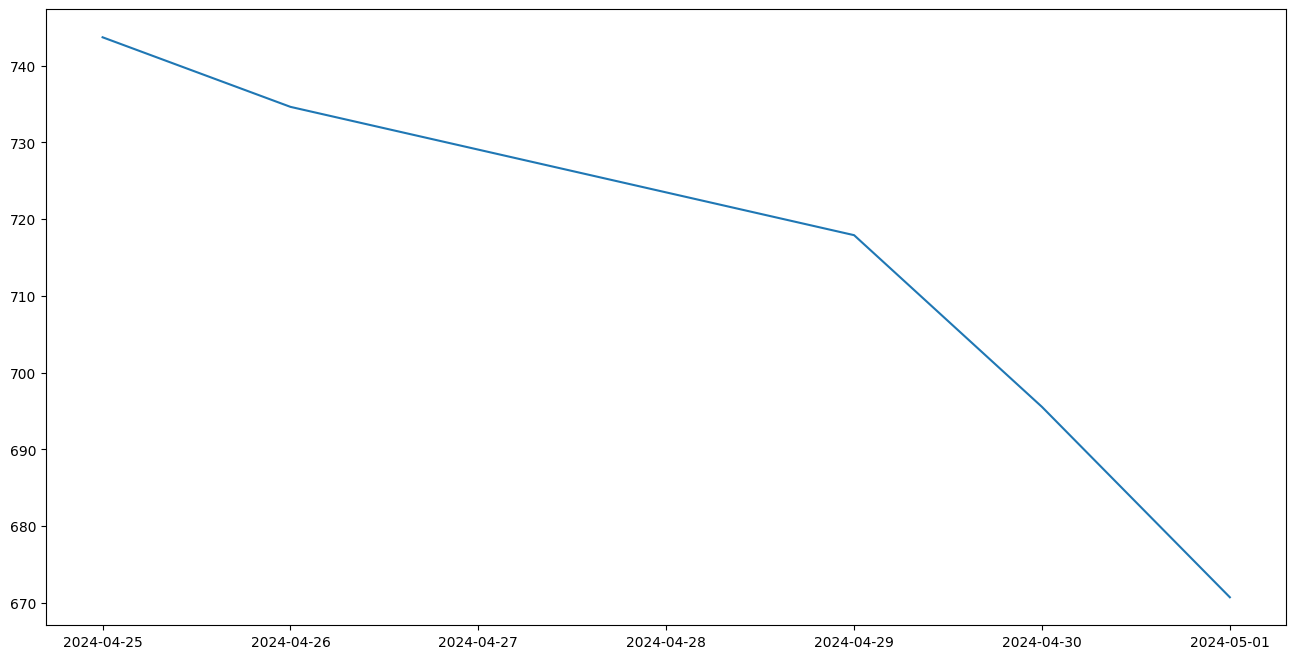

In [38]:
plt.figure(figsize=(16,8))
plt.plot(df_forecast["Close"])

Capturando os últimos 10 dias do dataframe da *NVIDIA*

In [39]:
df_nvd_close_end = df_nvd_close.tail(10)
df_nvd_close_end


,Close
2024-04-11,906.159973
2024-04-12,881.859985
2024-04-15,860.010010
2024-04-16,874.150024
2024-04-17,840.349976
2024-04-18,846.710022
2024-04-19,762.000000
2024-04-22,795.179993
2024-04-23,824.229980
2024-04-24,796.770020


Análise dos valores dos dados com valores futuros

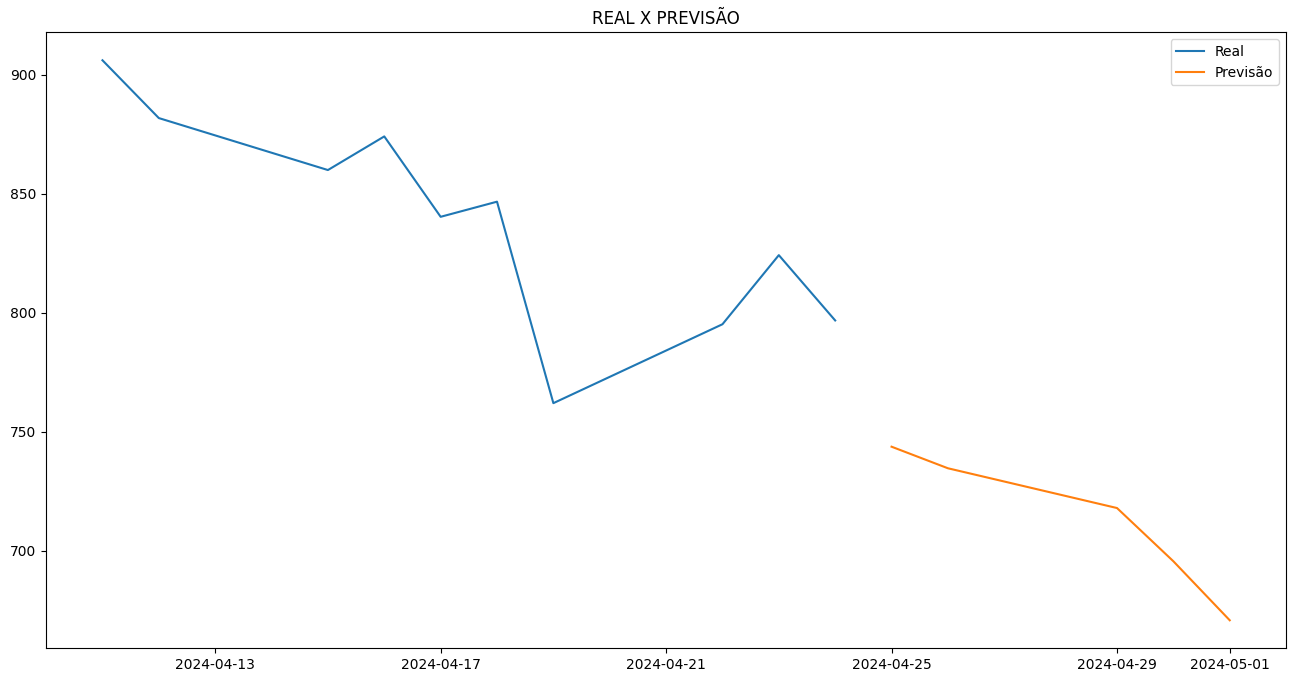

In [40]:
#Plotar gráfico
plt.figure(figsize=(16,8))
plt.plot(df_nvd_close_end["Close"])
plt.plot(df_forecast["Close"])
plt.legend(["Real", "Previsão"])
plt.title('REAL X PREVISÃO')
plt.show()

##CONCLUSÃO

Esse projeto consta aplicar o modelo neural *LSTM (Long Short-Term Memory)* que é um tipo especial de rede neural recorrente (RNN) projetada para aprender e reter informações em sequências temporais de dados. Os arquivos form retirados da plataforma do kaggle [Nvidia Corporation](https://www.kaggle.com/datasets/prajwaldongre/nvidia-corp-share-price-2000-2024)